# Stability Diagram
[<!-- module-ltg badge --><span class="module module-ltg">Low-Temperature Geochemistry</span>](module-ltg) 
```{index} Stability Diagram
```

Stability diagrams (dominance diagrams) are graphical representations of equilibria between minerals and aqueous solutions. They are useful in predicting what will happen when aqueous solutions of given composition interact with specific minerals. 

Stability diagrams can be built from thermodynamic data on $\Delta G$ of various reactions, $\Delta G^\circ = -RT \ln(K)$, and expressions of thermodynamic equilibrium constants ($K$). Let's recall Problem 1 in Practical 3 of Low-Temperature Geochemistry.

In [68]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

Consider the weathering of the mineral albite (a Na-plagioclase feldspar)

$$2NaAlSi_{3}O_{8}(s)+2H^{+}(aq)+9H_{2}O(l)=Al_{2}Si_{2}O_{5}(OH)_{4}(s)+2Na^{+}(aq)+4H_{4}SiO_{4}(aq)$$

a) Write the reaction quotient for this reaction ($Q=…$).

$$Q=\frac{a_{Al_{2}Si_{2}O_{5}(OH)_{4}} \cdot a_{Na^+}^2 \cdot a_{H_{4}SiO_{4}}^4}{a_{NaAlSi_{3}O_{8}}^2 \cdot a_{H^{+}}^2 \cdot a_{H_{2}O}^9}$$

b) Now assume this reaction is at equilibrium, write the equilibrium constant for this reaction ($K_{eq}=…$).

At equilibrium, $Q=K_{eq}$, so it’s the same:

$$Q=K_{eq}=\frac{a_{Al_{2}Si_{2}O_{5}(OH)_{4}} \cdot a_{Na^+}^2 \cdot a_{H_{4}SiO_{4}}^4}{a_{NaAlSi_{3}O_{8}}^2 \cdot a_{H^{+}}^2 \cdot a_{H_{2}O}^9}$$

c) Assume that you know the activities of each species ($a_i$), how would you simplify your answer in part a or b? Remember that for pure solids and liquids $a_j=1$.

The key is to note that the activity for pure liquids and pure solids are 1, so we can simplify the expression as follows:

$$K_{eq}=\frac{1 \cdot a_{Na^+}^2 \cdot a_{H_{4}SiO_{4}}^4}{1 \cdot a_{H^{+}}^2 \cdot 1}=\frac{a_{Na^+}^2 \cdot a_{H_{4}SiO_{4}}^4}{a_{H^{+}}^2}$$

d) The answer to part c should be

$$K_{eq}=a_{H_{4}SiO_{4}}^4 \cdot \frac{a_{Na^+}^2}{a_{H^{+}}^2}$$

Now take the logarithm on both side:

$$\log (K_{eq})=\log \left(a_{H_{4}SiO_{4}}^4 \cdot \frac{a_{Na^+}^2}{a_{H^{+}}^2}\right)$$

Simplify this expression by evaluating the logs:

$$\log (K_{eq})=4\log (a_{H_{4}SiO_{4}}) + 2\log \left(\frac{a_{Na^+}}{a_{H^{+}}}\right)$$

Rearrange to get:

$$\log \left(\frac{a_{Na^+}}{a_{H^{+}}}\right) = -2\log (a_{H_{4}SiO_{4}}) + \frac{1}{2}\log (K_{eq})$$

Note this could be the equation of a straight line: $y=mx+b$, with slope $m=-2$, $y=\ln\left(\frac{a_{Na^+}}{a_{H^{+}}}\right)$, $x=\log (a_{H_{4}SiO_{4}})$ and the y-intercept $b=\frac{1}{2}\log (K_{eq})$ If you were to plot this on a log-log plot, the slope is known, ($m=-2$), so all there is to define, is the intercept, meaning that one needs to evaluate $K_{eq}$.

(i) Evaluate $K_{eq}$ by applying Hess’ law to calculate the Gibbs free energy using the data in Table 1 (taken from P. Ryan’s book, p. 278) and then applying this to the expression $\Delta G_r^\circ = -RT \ln(K_{eq})$ and solving for $K_{eq}$.

In [69]:
# Table 1
# data
compounds = ["$NaAlSi_{3}O_{8}$",
             "$Al_{2}Si_{2}O_{5}(OH)_{4}$",
             "$Na_{0.33}Al_{2}(Si_{3.67}Al_{0.33})O_{10}(OH)_{2}$",
             "$Al(OH)_3$",
             "$H^+$",
             "$H_{2}O(l)$",
             "$Na^{+}(aq)$",
             "$H_{4}SiO_{4}$"]
names = ["Albite (low albite)", "Kaolinite", "Na-beidellite", "Gibbsite", "Hydrogen ion", "Water", "Sodium ion", "Dissolved silica"]
std_Gf_str = ["-3712", "-3778", "-5354", "-1144", "0", "-237.2", "-261.7", "-1316"]
std_Gf_num = [float(G) for G in std_Gf_str]  # kJ/mol

dict = {'Chemical formula of compound or species' : compounds,
        'Name' : names,
       '$G_{f}^{o}$' : std_Gf_str}
df = pd.DataFrame(dict)
  
print("Table 1: Thermodynamic data from P. Ryan's book, p278.")
# displaying the DataFrame
display(df.style.hide_index())

Table 1: Thermodynamic data from P. Ryan's book, p278.


Chemical formula of compound or species,Name,$G_{f}^{o}$
$NaAlSi_{3}O_{8}$,Albite (low albite),-3712
$Al_{2}Si_{2}O_{5}(OH)_{4}$,Kaolinite,-3778
$Na_{0.33}Al_{2}(Si_{3.67}Al_{0.33})O_{10}(OH)_{2}$,Na-beidellite,-5354
$Al(OH)_3$,Gibbsite,-1144
$H^+$,Hydrogen ion,0
$H_{2}O(l)$,Water,-237.2
$Na^{+}(aq)$,Sodium ion,-261.7
$H_{4}SiO_{4}$,Dissolved silica,-1316


By Hess' law,
    
$$\Delta G_r = \left(\Delta G_f^\circ\left(Al_{2}Si_{2}O_{5}(OH)_{4}(s)\right) + 2\Delta G_f^\circ\left(Na^{+}(aq)\right) + 4\Delta G_f^\circ\left(H_{4}SiO_{4}(aq)\right)\right) \\ - \left(2\Delta G_f^\circ\left(NaAlSi_{3}O_{8}(s)\right) + 2\Delta G_f^\circ\left(H^{+}(aq)\right) + 9\Delta G_f^\circ\left(H_{2}O(l)\right)\right) $$

Using the data in Table 1 above:

In [70]:
# Delta_Gr = (kaolinite + 2 Na ion + 4 dissolved silica) - (2 albite + 2 H ion + 9 water)

# calculate Delta_Gr
Delta_Gr = ((1*std_Gf_num[names.index("Kaolinite")] + 2*std_Gf_num[names.index("Sodium ion")] + 4*std_Gf_num[names.index("Dissolved silica")]) - 
                 (2*std_Gf_num[names.index("Albite (low albite)")] + 2*std_Gf_num[names.index("Hydrogen ion")] + 9*std_Gf_num[names.index("Water")]))
print(f"The Gibbs free energy of the reaction is {Delta_Gr:.1f} kJ.")

The Gibbs free energy of the reaction is -6.6 kJ.


So, $\Delta G_r = 6.6\,kJ$.
    
We also know that
    
$$\Delta G_r = -RT \ln(K_{eq})$$

So we can calculate $K_{eq}$:
    
$$\ln(K_{eq}) = -\frac{\Delta G_r}{RT}$$

It is also helpful to change natural log to base-10 log, as the numbers are much easier and intuitive to understand in base-10 log. To do this, let’s review how to convert from $\ln(x)$ to $\log(x)$. 
    
By definition of what logarithms do: $y=\log_{10}x$ and so $10^{y}=x$. Taking the natural log ($\ln$) on both sides: $\ln(10^y) = \ln(x)$. This is the same as $y\cdot\ln(10)=\ln(x)$ and so $y=\frac{\ln(x)}{\ln(10)}=\log_{10}x$, and we see that to convert $\ln(K_{eq})$ to $\log(K_{eq})$, we just have to divide both sides by $\ln(10)$, so

$$\log(K_{eq}) = \frac{\ln(K_{eq})}{\ln(10)} = -\frac{\Delta G_r}{RT\ln(10)}$$

Numerically, with $R=8.314\,(J\,mol^{-1}K^{-1})$ and $T=298\,K$,

$$\log(K_{eq}) = -\frac{-6.6}{8.314\cdot298\cdot\ln(10)} = 1.2$$

which means that

$$K_{eq} = 10^{\log(K_{eq})} = 10^{1.2}$$

Thus, $\Delta G_r = 6.6\,kJ$ and $K_{eq} = 10^{1.2}$

(ii) The line equation becomes:

$$\log \left(\frac{a_{Na^+}}{a_{H^{+}}}\right) = -2\log (a_{H_{4}SiO_{4}}) + 0.6$$

Sketch a plot of this line with $\log (a_{H_{4}SiO_{4}})$ on the x-axis and $\log \left(\frac{a_{Na^+}}{a_{H^{+}}}\right)$ on the y-axis.

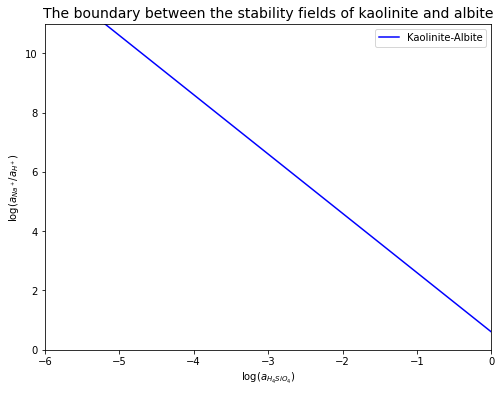

In [71]:
# create a function to return y (log(a_Na+/a_H+)) for the kaolinite-albite equilibrium line
def y_KA(x):
    return -2*x + 0.6

# plot
plt.figure(figsize=(8,6))
log_silica = np.array([-6, 0])  # Set the begin and end of line
plt.plot(log_silica, y_KA(log_silica), 'b', label='Kaolinite-Albite')
plt.xlabel('$\log (a_{H_{4}SiO_{4}})$')
plt.ylabel('$\log (a_{Na^+}/a_{H^+})$')
plt.xlim([-6, 0])
plt.ylim([0, 11])
plt.title('The boundary between the stability fields of kaolinite and albite', fontsize=14)
plt.legend(loc='best', fontsize=10)

e) Repeat steps a-d above for the weathering reaction between gibbsite and kaolinite, given by the following reaction:

$$Al_{2}Si_{2}O_{5}(OH)_{4}(s)+5H_{2}O(l)=2Al(OH)_{3}(s)+2H_{4}SiO_{4}(aq)$$

(i) Write an expression for the equilibrium constant (like steps a-c above). Noting that all species but one are pure liquids or solids, you should get:

$$K_{eq}=a_{H_{4}SiO_{4}}^2$$

Again, taking logs on both sides and putting this expression in the same “line” form as earlier, we get:

$$0 = -\log(a_{H_{4}SiO_{4}})+\frac{1}{2}\log(K_{eq})$$

Using the thermodynamic data from Table 1 and the same way to calculate $\Delta G_r$ as above, we get $K_{eq}=10^{-7.7}$.

So, $\log(a_{H_{4}SiO_{4}})=\frac{1}{2}(-7.7)=-3.85$, and we see that this line is vertical on the $\log(a_{H_{4}SiO_{4}})$ VS $\log \left(\frac{a_{Na^+}}{a_{H^{+}}}\right)$ plot.

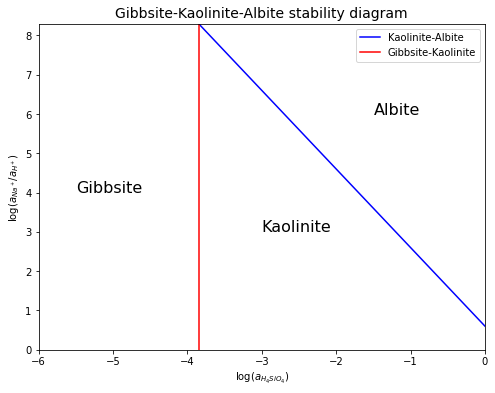

In [72]:
# plot
plt.figure(figsize=(8,6))
log_silica_KA = np.array([-3.85, 0])  # Set the new begin and end of the kaolinite-albite equilibrium line
plt.plot(log_silica_KA, y_KA(log_silica_KA), 'b', label='Kaolinite-Albite')  # plot the kaolinite-albite equilibrium line
plt.plot([-3.85, -3.85], [0, y_KA(-3.85)], 'r', label='Gibbsite-Kaolinite')  # plot the gibbsite-kaolinite equilibrium line
plt.xlabel('$\log (a_{H_{4}SiO_{4}})$')
plt.ylabel('$\log (a_{Na^+}/a_{H^+})$')
plt.xlim([-6, 0])
plt.ylim([0,  y_KA(-3.85)])
plt.title('Gibbsite-Kaolinite-Albite stability diagram', fontsize=14)
plt.text(-5.5, 4, 'Gibbsite', fontsize=16)
plt.text(-3, 3, 'Kaolinite', fontsize=16)
plt.text(-1.5, 6, 'Albite', fontsize=16)
plt.legend(loc='best', fontsize=10)

The stability diagram above is a simplified version, acquired from the given information. A more complex version of it is shown in Figure 1 below.

![](images/SD1.png)

$\quad$Figure 1: A mineral stability diagram showing stability fields for gibbsite, kaolinite, Na-beidellite (smectite), and albite at $25^\circ C$ and $1\,atm$ (Ryan, 2019).

## References

- Lecture slide for Lecture 7 of the Low-Temperature Geochemistry module
- Practical for Lecture 3 of the Low-Temperature Geochemistry module
- Ryan, P. (2019) Environmental and Low-Temperature Geochemistry. Wiley-Blackwell.